In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

/tmp/ipykernel_1337937/65408254.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
env_name = "WallEnv"
runs_dir = '../runs2'
runs = [os.path.join(runs_dir, d) for d in os.listdir(runs_dir) if os.path.isdir(os.path.join(runs_dir, d))]
results = [os.path.join(d, "results.csv") for d in runs if os.path.exists(os.path.join(d, 'results.csv'))]
results = [result for result in results if env_name in result]
results

['../runs2/WallEnv-v0__minigrid-test-ppo__1__1709873932/results.csv',
 '../runs2/WallEnv-v0__minigrid-test-ppo__1__1709862864/results.csv',
 '../runs2/WallEnv-v0__minigrid-test-ppo__1__1709869087/results.csv',
 '../runs2/WallEnv-v0__minigrid-test-ppo__1__1709896508/results.csv',
 '../runs2/WallEnv-v0__minigrid-test-ppo__1__1709842637/results.csv',
 '../runs2/WallEnv-v0__minigrid-test-ppo__1__1709879765/results.csv',
 '../runs2/WallEnv-v0__minigrid-test-ppo__1__1709887274/results.csv',
 '../runs2/WallEnv-v0__minigrid-test-ppo__1__1709850844/results.csv']

In [4]:
dfs = [pd.read_csv(r) for r in results]
dfs[1]

,# Total Parameters,# Total Neurons,Model Summary,Environment,Size,Use Lava,Average Test Reward,Test Reward Variance
0,31120,31120,"Sequential(\n (0): Conv2d(3, 8, kernel_size=(...",WallEnv-v0,10,False,0.316945,0.371724
1,33712,33712,"Sequential(\n (0): Conv2d(3, 8, kernel_size=(...",WallEnv-v0,10,False,0.229925,0.295259
2,38896,38896,"Sequential(\n (0): Conv2d(3, 8, kernel_size=(...",WallEnv-v0,10,False,0.176422,0.256538
3,31776,31776,"Sequential(\n (0): Conv2d(3, 8, kernel_size=(...",WallEnv-v0,10,False,0.140470,0.231259
4,34880,34880,"Sequential(\n (0): Conv2d(3, 8, kernel_size=(...",WallEnv-v0,10,False,0.116272,0.212854
5,41088,41088,"Sequential(\n (0): Conv2d(3, 8, kernel_size=(...",WallEnv-v0,10,False,0.118687,0.202547
6,33088,33088,"Sequential(\n (0): Conv2d(3, 8, kernel_size=(...",WallEnv-v0,10,False,0.171934,0.273094
7,37216,37216,"Sequential(\n (0): Conv2d(3, 8, kernel_size=(...",WallEnv-v0,10,False,0.153248,0.260268
8,45472,45472,"Sequential(\n (0): Conv2d(3, 8, kernel_size=(...",WallEnv-v0,10,False,0.136442,0.249948
9,56856,56856,"Sequential(\n (0): Conv2d(3, 8, kernel_size=(...",WallEnv-v0,10,False,0.138166,0.247160


In [5]:
combined_df = pd.concat(dfs, ignore_index=True)
average_rewards = combined_df.groupby(['# Total Parameters', 'Size'])[['Average Test Reward', 'Test Reward Variance']].mean().reset_index()
pivoted_data = average_rewards.pivot(index='Size', columns='# Total Parameters', values=['Average Test Reward', 'Test Reward Variance'])
pivoted_data

Average Test Reward                                \
# Total Parameters              31120     31776     33088     33712    
Size                                                                   
6                             0.191500  0.280406  0.323464  0.261750   
8                             0.024875  0.244574  0.221973  0.229281   
10                            0.316945  0.140470  0.171934  0.229925   
12                            0.024344  0.008664  0.010152  0.017328   
14                            0.201283  0.056614  0.036840  0.102043   
16                            0.000000  0.005099  0.008533  0.007326   
18                            0.003417  0.006208  0.067970  0.007090   
20                            0.008154  0.003062  0.025121  0.006123   

                                                                      \
# Total Parameters    34880     37216     38896     41088     45472    
Size                                                                   
6                   0.300950  0.319594  0.364875  0.294979  0.346847   
8                   0.232833  0.243084  0.314104  0.237516  0.266412   
10                  0.116272  0.153248  0.176422  0.118687  0.136442   
12                  0.006931  0.015949  0.011552  0.009078  0.014177   
14                  0.047589  0.080431  0.071114  0.042980  0.071494   
16                  0.007896  0.008016  0.006799  0.006580  0.007820   
18                  0.094403  0.079092  0.008278  0.079299  0.070628   
20                  0.003137  0.022510  0.004082  0.002614  0.020009   

                              ... Test Reward Variance                      \
# Total Parameters    56856   ...               71592     108328    109368   
Size                          ...                                            
6                   0.360262  ...             0.289690  0.291352  0.287775   
8                   0.273123  ...             0.313074  0.316810  0.319104   
10                  0.138166  ...             0.276173  0.271047  0.269763   
12                  0.038400  ...             0.216483  0.211594  0.276379   
14                  0.064345  ...             0.125532  0.122419  0.167786   
16                  0.007717  ...             0.152827  0.149063  0.139324   
18                  0.063844  ...             0.149180  0.145486  0.135948   
20                  0.019488  ...             0.190440  0.185743  0.173968   

                                                                      \
# Total Parameters    110920    111448    112472    115576    116104   
Size                                                                   
6                   0.294225  0.293338  0.289394  0.292537  0.290233   
8                   0.315544  0.331849  0.324822  0.330355  0.314210   
10                  0.279256  0.274796  0.265535  0.270901  0.274186   
12                  0.251273  0.296913  0.300203  0.292229  0.281857   
14                  0.173865  0.162535  0.164556  0.159671  0.171263   
16                  0.145569  0.131171  0.136425  0.128803  0.142372   
18                  0.142104  0.130396  0.133173  0.128052  0.138946   
20                  0.181582  0.164085  0.170452  0.161132  0.177625   

                                        
# Total Parameters    118680    123832  
Size                                    
6                   0.292843  0.294984  
8                   0.329995  0.330904  
10                  0.278940  0.272211  
12                  0.295088  0.288008  
14                  0.165490  0.157938  
16                  0.133653  0.126547  
18                  0.130493  0.125797  
20                  0.167147  0.158331  

[8 rows x 54 columns]

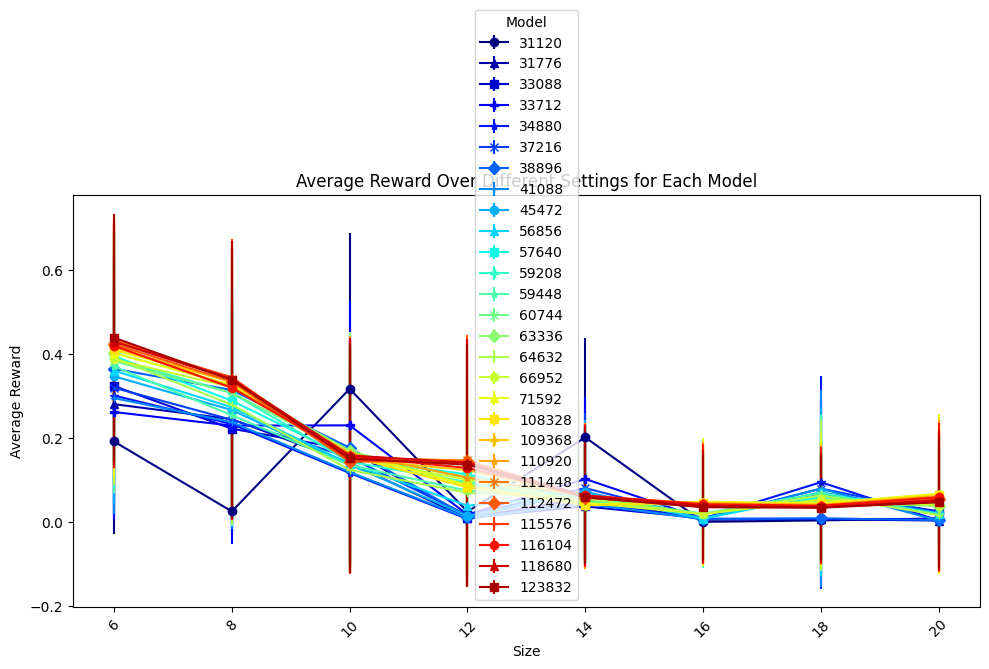

In [6]:
import itertools
import matplotlib.colors as mcolors

plt.figure(figsize=(10, 6))

cmap = plt.cm.jet
norm = mcolors.Normalize(vmin=0, vmax=len(combined_df['# Total Parameters'].unique()))

markers = itertools.cycle(['o', '^', 's', 'P', '*', 'x', 'D', '+'])
for i, column in enumerate(pivoted_data['Average Test Reward'].columns):
    plt.errorbar(pivoted_data['Average Test Reward'][column].index.values,
             pivoted_data['Average Test Reward'][column].values,
             marker=next(markers),
             label=column,
             yerr=pivoted_data['Test Reward Variance'][column].values,
             color=cmap(norm(i)))

plt.title('Average Reward Over Different Settings for Each Model')
plt.xlabel('Size')
plt.ylabel('Average Reward')
# settings = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
settings = [6, 8, 10, 12, 14, 16, 18, 20]
plt.xticks(settings, rotation=45)
plt.legend(title='Model')
plt.tight_layout()
plt.show()